In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Importing Files
This weather data is a build-in keras dataset of atmospheric information collected from 2009 to 2016.

In [2]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

13568290/13568290 [==============================] - 1s 0us/step


In [3]:
df = pd.read_csv(csv_path)
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


# Partitioning Data
Data on weather was recorded at 10-minute intervals. For the sake of this project, I'll reduce it down to an hourly measurement.

In [4]:
#take every sixth row
df = df[5::6]
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


In [5]:
#setting dataframe index to date-time
df.index = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 01:00:00,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


<AxesSubplot:xlabel='Date Time'>

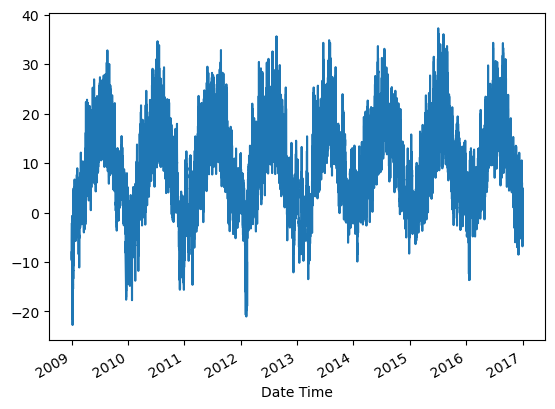

In [6]:
#plotting yearly temp. patterns
temp = df['T (degC)']
temp.plot()

# ***Single Variable Time Series Forecasting***
I'll be building out a Long Short-Term Memory Neural Network. As an input to this model, I'll pass in weather data from 5 hours. The output will be the model's prediction for the next hour. Then, the model will receive input from a 5 hour grouping starting one hour later, and so on.


*Iteration 1: in(1, 2, 3, 4, 5) -> out(predict 6)*

*Iteration 2: in(2, 3, 4, 5, 6) -> out(predict 7)*

*....*

*Iteration n: in(n-4, n-3, n-2, n-1, n) -> out(pred n+1)*


This "sliding window" approach only requires one recurring network layer that will be applied to each input matrix.

# From Dataframe to Matrix
In order to build the neural network described above, I have to map each group of rows in the dataframe to a vector containing weather data. In this case, I'll just be using the temperature variable to predict the temperature, although you could utilize multivariate forecasting to likely be more precise.

In [7]:
#dataframe to matrix function
def df_to_matrix(df, window_size=5):
    df_as_np = df.to_numpy()
    X = []
    y = []
    
    #iterating over numpy matrix
    for i in range(len(df_as_np) - window_size):
        #getting 5 rows worth of data & adding vect. to X
        row = [[a] for a in df_as_np[i:i+5]]
        X.append(row)
        #getting expected output & adding to y
        actual = df_as_np[i+5] #'i+5' because 'i:i+5' doesn't include 'i+5'
        y.append(actual)

    #return tuple of X array and y array
    return np.array(X), np.array(y)

# Creating Features and Target, Splitting

In [8]:
X, y = df_to_matrix(temp)
X.shape, y.shape

((70086, 5, 1), (70086,))

In [9]:
X_train, y_train = X[:60000], y[:60000]
X_val, y_val = X[60000:65000], y[60000:65000]
X_test, y_test = X[65000:], y[65000:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((60000, 5, 1), (60000,), (5000, 5, 1), (5000,), (5086, 5, 1), (5086,))

# Building Model
Now that the data has been formatted and seperated into training data, validation data, and testing data, the model can be built!

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [11]:
model1 = Sequential()
#input is expected to be a 5X1 vector
model1.add(InputLayer((5, 1)))
#recurring layer
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
#output should be 1 numeric value
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


# Specifying Training Callbacks
The ModelCheckpoint will only save the model with the lowest loss grade, which is the mean squared error in our case.

In [12]:
cp = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [13]:
#fitting model to training data and testing it against validation data
#run through dataset 10 times, only updating the model if it performed better than the last iteration
model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp])

Epoch 1/10
1875/1875 [==============================] - 18s 6ms/step - loss: 31.1433 - root_mean_squared_error: 5.5806 - val_loss: 1.1200 - val_root_mean_squared_error: 1.0583
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 1.6735 - root_mean_squared_error: 1.2936 - val_loss: 0.6050 - val_root_mean_squared_error: 0.7778
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.8473 - root_mean_squared_error: 0.9205 - val_loss: 0.5209 - val_root_mean_squared_error: 0.7217
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.7098 - root_mean_squared_error: 0.8425 - val_loss: 0.5105 - val_root_mean_squared_error: 0.7145
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6772 - root_mean_squared_error: 0.8229 - val_loss: 0.5033 - val_root_mean_squared_error: 0.7095
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6644 - root_mean_squared_error: 0.8151 - val_l

# Training Analysis
The model performed well, with its val_loss metric from the first epoch being 1.3, and dropping down to 0.49 by the final iteration. The model performed best on the 9th iteration, so that model will be saved to the 'model1/' directory by the ModelCheckpoint object.

In [14]:
from tensorflow.keras.models import load_model
model1 = load_model('model1')

In [15]:
# the flatten method gets rid of internal lists. [[5], [6]] -> [5, 6]
train_predictions = model1.predict(X_train).flatten()
train_results = pd.DataFrame({
    "Predictions" : train_predictions,
    "Actuals" : y_train
})
train_results.head()

1875/1875 [==============================] - 4s 2ms/step


,Predictions,Actuals
0,-9.749097,-9.67
1,-9.473578,-9.17
2,-8.569425,-8.10
3,-7.114522,-7.66
4,-7.046812,-7.04


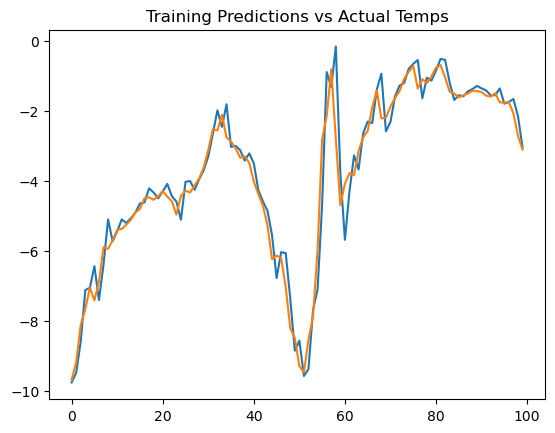

In [16]:
import matplotlib.pyplot as plt
plt.plot(train_results['Predictions'][:100])
plt.plot(train_results['Actuals'][:100])
plt.title("Training Predictions vs Actual Temps")
plt.show()

In [17]:
val_predictions = model1.predict(X_val).flatten()
val_results = pd.DataFrame({
    "Predictions" : val_predictions,
    "Actuals" : y_val
})
val_results.head()

157/157 [==============================] - 1s 2ms/step


,Predictions,Actuals
0,15.580661,14.02
1,13.368181,13.67
2,13.106278,12.27
3,11.604152,11.19
4,10.487064,10.85


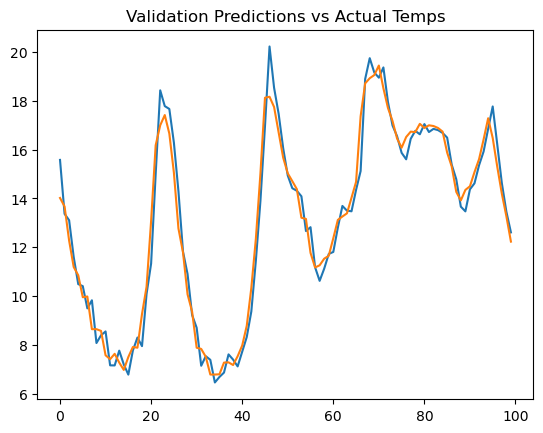

In [18]:
plt.plot(val_results['Predictions'][:100])
plt.plot(val_results['Actuals'][:100])
plt.title("Validation Predictions vs Actual Temps")
plt.show()

In [19]:
test_predictions = model1.predict(X_test).flatten()
test_results = pd.DataFrame({
    "Predictions" : test_predictions,
    "Actuals" : y_test
})
test_results.head()

159/159 [==============================] - 0s 2ms/step


,Predictions,Actuals
0,14.481353,13.99
1,13.350459,13.46
2,12.935807,12.93
3,12.527375,12.43
4,12.080515,12.17


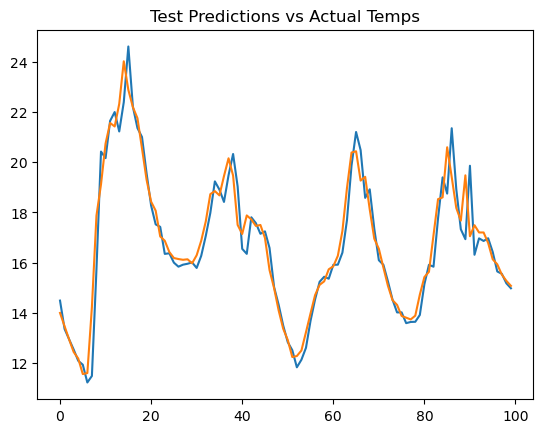

In [20]:
plt.plot(test_results['Predictions'][:100])
plt.plot(test_results['Actuals'][:100])
plt.title("Test Predictions vs Actual Temps")
plt.show()

# Post-Analysis
Overall, the model performed very well. Implimenting an LSTM neural network was an effective way to predict the temperature of the coming day based upon, in this run, the previous 5 days of temperature. 

I really hope you enjoyed this notebook, and as always--please reach out to me at hismith142@gmail.com if you have any questions!